### Load libraries

In [ ]:

import sys
sys.path.insert(0, '../src/')

from load_modify_sample_utils import load_model, get_objective_functions, modify_model, get_reaction_bounds
from load_modify_sample_utils import sample_dingo
from load_modify_sample_utils import sample_optgp, plot_grid_reactions_flux, sampling_statistics

from pathways_utils import sort_reactions_in_pathways_by_reactions_in_model_order, subset_sampling_df_from_reaction_ids
from pathways_utils import map_model_to_kegg_reactions, read_json_file, bigg_to_kegg_id, fill_missing_kegg_ids_in_dict
from pathways_utils import get_kegg_pathways_from_reaction_ids, subset_model_reactions_from_pathway_info
from pathways_utils import dictionary_bigg_id_to_pathway_names, dictionary_forward_reverse_bigg_id_to_pathway_names
from pathways_utils import reaction_in_pathway_binary_matrix, plot_reaction_in_pathway_heatmap


### Load and inspect model

In the following chunk, functions that load a metabolic model given in an SBML format are presented.

The function returns 4 objects, 2 metabolic models in cobra and dingo formats and their corresponding reactions.

The `get_objective_functions` function is used to inform the user on the current objective function, while
the `get_reaction_bounds` returns a dictionary of the current bounds of all reactions in the given model.


In [6]:

ec_cobra_model, ec_cobra_reactions, ec_dingo_model, ec_dingo_reactions = load_model("../ext_data/models/e_coli_core.xml")

default_objective_functions = get_objective_functions(ec_cobra_model)
print(default_objective_functions)

default_reaction_bounds = get_reaction_bounds(ec_cobra_model)
print(default_reaction_bounds.get("BIOMASS_Ecoli_core_w_GAM"))



Set parameter Username
Set parameter LicenseID to value 2642044
Academic license - for non-commercial use only - expires 2026-03-25


NameError: name 'MetabolicNetwork' is not defined

### Perform FBA on the initial model

In [3]:

solution = ec_cobra_model.optimize()
print(solution.objective_value)


0.8739215069684302


### Modify a model

Function that modifies a given cobra model.

Users can change objective function, optimal percentage (lower bound of the objective will be fixed based on the optimal percentage),
define custom reaction bounds and change objective direction.

This function enables the user to create metabolic models simulating diffeent conditions. Here 2 new models are created:
- One that maximizes for biomass production (asking at least 100% of the biomass maximum FBA value)
- One that maximize for biomass production (asking at least 0% of the biomass maximum FBA value)


In [4]:

# Set optimal percentage to 100
ec_cobra_model_condition_100, ec_dingo_model_condition_100 = modify_model(
    cobra_model         = ec_cobra_model,
    objective_function  = "BIOMASS_Ecoli_core_w_GAM",
    optimal_percentage  = 100,
    objective_direction = "max"
)

updated_objective_functions = get_objective_functions(ec_cobra_model_condition_100)
print(updated_objective_functions)

updated_reaction_bounds = get_reaction_bounds(ec_cobra_model_condition_100)
print(updated_reaction_bounds.get("BIOMASS_Ecoli_core_w_GAM"))

# -----------

# Set optimal percentage to 0
ec_cobra_model_condition_0, ec_dingo_model_condition_0 = modify_model(
    cobra_model         = ec_cobra_model,
    objective_function  = "BIOMASS_Ecoli_core_w_GAM",
    optimal_percentage  = 0,
    objective_direction = "max"
)

updated_objective_functions = get_objective_functions(ec_cobra_model_condition_0)
print(updated_objective_functions)

updated_reaction_bounds = get_reaction_bounds(ec_cobra_model_condition_0)
print(updated_reaction_bounds.get("BIOMASS_Ecoli_core_w_GAM"))


Read LP format model from file /tmp/tmp_3zb7jcj.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
['BIOMASS_Ecoli_core_w_GAM']
(0.872922, 1000)
Read LP format model from file /tmp/tmplkl1c0p4.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
['BIOMASS_Ecoli_core_w_GAM']
(0.0, 1000)


### Peform FBA on the modified models

Should get the same values if objective function and direction were not changed (as done above)

In [5]:

solution_1 = ec_cobra_model_condition_100.optimize()
print(solution_1.objective_value)


solution_2 = ec_cobra_model_condition_0.optimize()
print(solution_2.objective_value)


0.8739215069684301
0.8739215069684301


### Sampling will be performed with different algorithms (see `load_modify_utils.py` for all available options) on the metabolic models created above.

Sample using `dingo` is performed in the following chunk. Users can change the `ess`, `solver`, `final_n_samples` parameters:
- `ess` stands for Effective Sample Size
- `solver` sets the corresponding solver algorithm
- `final_n_samples` defines the final number of samples returned to the user as a post-sampling step.

In [6]:

samples_dingo_condition_100 = sample_dingo(ec_dingo_model_condition_100, reaction_in_rows = True, ess=3000, solver="gurobi", final_n_samples=2000)
samples_dingo_condition_0 = sample_dingo(ec_dingo_model_condition_0, reaction_in_rows = True, ess=3000, solver="gurobi", final_n_samples=2000)


Set parameter Username
Set parameter LicenseID to value 2642044
Academic license - for non-commercial use only - expires 2026-03-25
phase 1: number of correlated samples = 500, effective sample size = 4, ratio of the maximum singilar value over the minimum singular value = 1543.32
phase 2: number of correlated samples = 500, effective sample size = 3, ratio of the maximum singilar value over the minimum singular value = 347.57
phase 3: number of correlated samples = 500, effective sample size = 7, ratio of the maximum singilar value over the minimum singular value = 101.295
phase 4: number of correlated samples = 500, effective sample size = 140, ratio of the maximum singilar value over the minimum singular value = 43.8134
phase 5: number of correlated samples = 500, effective sample size = 144, ratio of the maximum singilar value over the minimum singular value = 3.28308
phase 6: number of correlated samples = 500, effective sample size = 167, ratio of the maximum singilar value over 

[5]maximum marginal PSRF: 1.07028



[5]total ess 3010: number of correlated samples = 8800


phase 1: number of correlated samples = 500, effective sample size = 22, ratio of the maximum singilar value over the minimum singular value = 783.501
phase 2: number of correlated samples = 500, effective sample size = 147, ratio of the maximum singilar value over the minimum singular value = 2.5515
phase 3: number of correlated samples = 2400, effective sample size = 979
phase 4: number of correlated samples = 2400, effective sample size = 1122
phase 5: number of correlated samples = 1800, effective sample size = 740
[5]total ess 3010: number of correlated samples = 7600




[5]maximum marginal PSRF: 1.004



Sample using `OptGp` is performed in the following chunk. Users can change the `n_samples`, `thinning`, parameters:
- `n_samples` defines the number of samples returned to the user.
- `thinning` defines the `thinning` parameter. Default to 100 means samples are returned every 100th step.


In [7]:

samples_optgp_condition_100 = sample_optgp(ec_cobra_model_condition_100, n_samples = 3000, thinning=100, reaction_in_rows = True)
samples_optgp_condition_0 = sample_optgp(ec_cobra_model_condition_0, n_samples = 3000, thinning=100, reaction_in_rows = True)


Read LP format model from file /tmp/tmp2ra2gm7s.lp


Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmp3zja3lr3.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros


### Map KEGG pathway information to reactions BiGG ids  

Functions that are used to map information from KEGG pathways to the model reactions (BiGG ids)

- `map_model_to_kegg_reactions`: make a dict that will assign KEGG terms to BiGG ids (only model information)
- `read_json_file`: function that reads the json file where the KEGG information is stored
- `fill_missing_kegg_ids_in_dict`: function that enriches the missing information from the initial dictionary.
- `get_kegg_pathways_from_reaction_ids`: function that creates a pandas dataframe storing BiGG and KEGG information

In [8]:
initial_bigg_to_kegg_dictionary = map_model_to_kegg_reactions(ec_cobra_model)


reactions_json, reactions_pandas = read_json_file("../ext_data/reactions/reactions.json")


final_bigg_to_kegg_dictionary = fill_missing_kegg_ids_in_dict(initial_bigg_to_kegg_dictionary, reactions_pandas)


df_kegg_pathways = get_kegg_pathways_from_reaction_ids(final_bigg_to_kegg_dictionary)

WARNING [bioservices.KEGG:596]:  status is not ok with Bad Request
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Bad Request
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Bad Request
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Bad Request
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Bad Request
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Bad Request
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Bad Request
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  s

### Subset sampling dataframe to include only reactions from pathways of interest

This is done to analyze/plot only reactions/pathways of interest.

In [ ]:

# Subset model reactions from corresponding KEGG pathways
glycolysis = subset_model_reactions_from_pathway_info(df_kegg_pathways, "Glycolysis")
ppp = subset_model_reactions_from_pathway_info(df_kegg_pathways, "Pentose")


# Order reactions from above lists based on the model order
reactions_in_pathways_ordered_duplicates = sort_reactions_in_pathways_by_reactions_in_model_order(ec_dingo_reactions, glycolysis, ppp)


# Remove duplicates from the above list
reactions_in_pathways_ordered = []
[reactions_in_pathways_ordered.append(val) for val in reactions_in_pathways_ordered_duplicates if val not in reactions_in_pathways_ordered]


# Subset the first sampling dataframe with glycolysis and ppp reactions
subset_pathways_optgp_condition_100 = subset_sampling_df_from_reaction_ids(
                                                                samples_optgp_condition_100, 
                                                                ec_dingo_reactions, 
                                                                subset_reactions = reactions_in_pathways_ordered)


# Subset the second sampling dataframe with glycolysis and ppp reactions
subset_pathways_optgp_condition_0 = subset_sampling_df_from_reaction_ids(
                                                                samples_optgp_condition_0, 
                                                                ec_dingo_reactions, 
                                                                subset_reactions = reactions_in_pathways_ordered)


### Plot grid of the distributions

This plot enables inspections to the sampling distributions to get early insights.

Left/Right Shifted, Normal, Fixed or other Uncommon distributions can be detected.

In the following chunk the grid from glycolysis and ppp pathways resulting from the first sampling dataframe exists

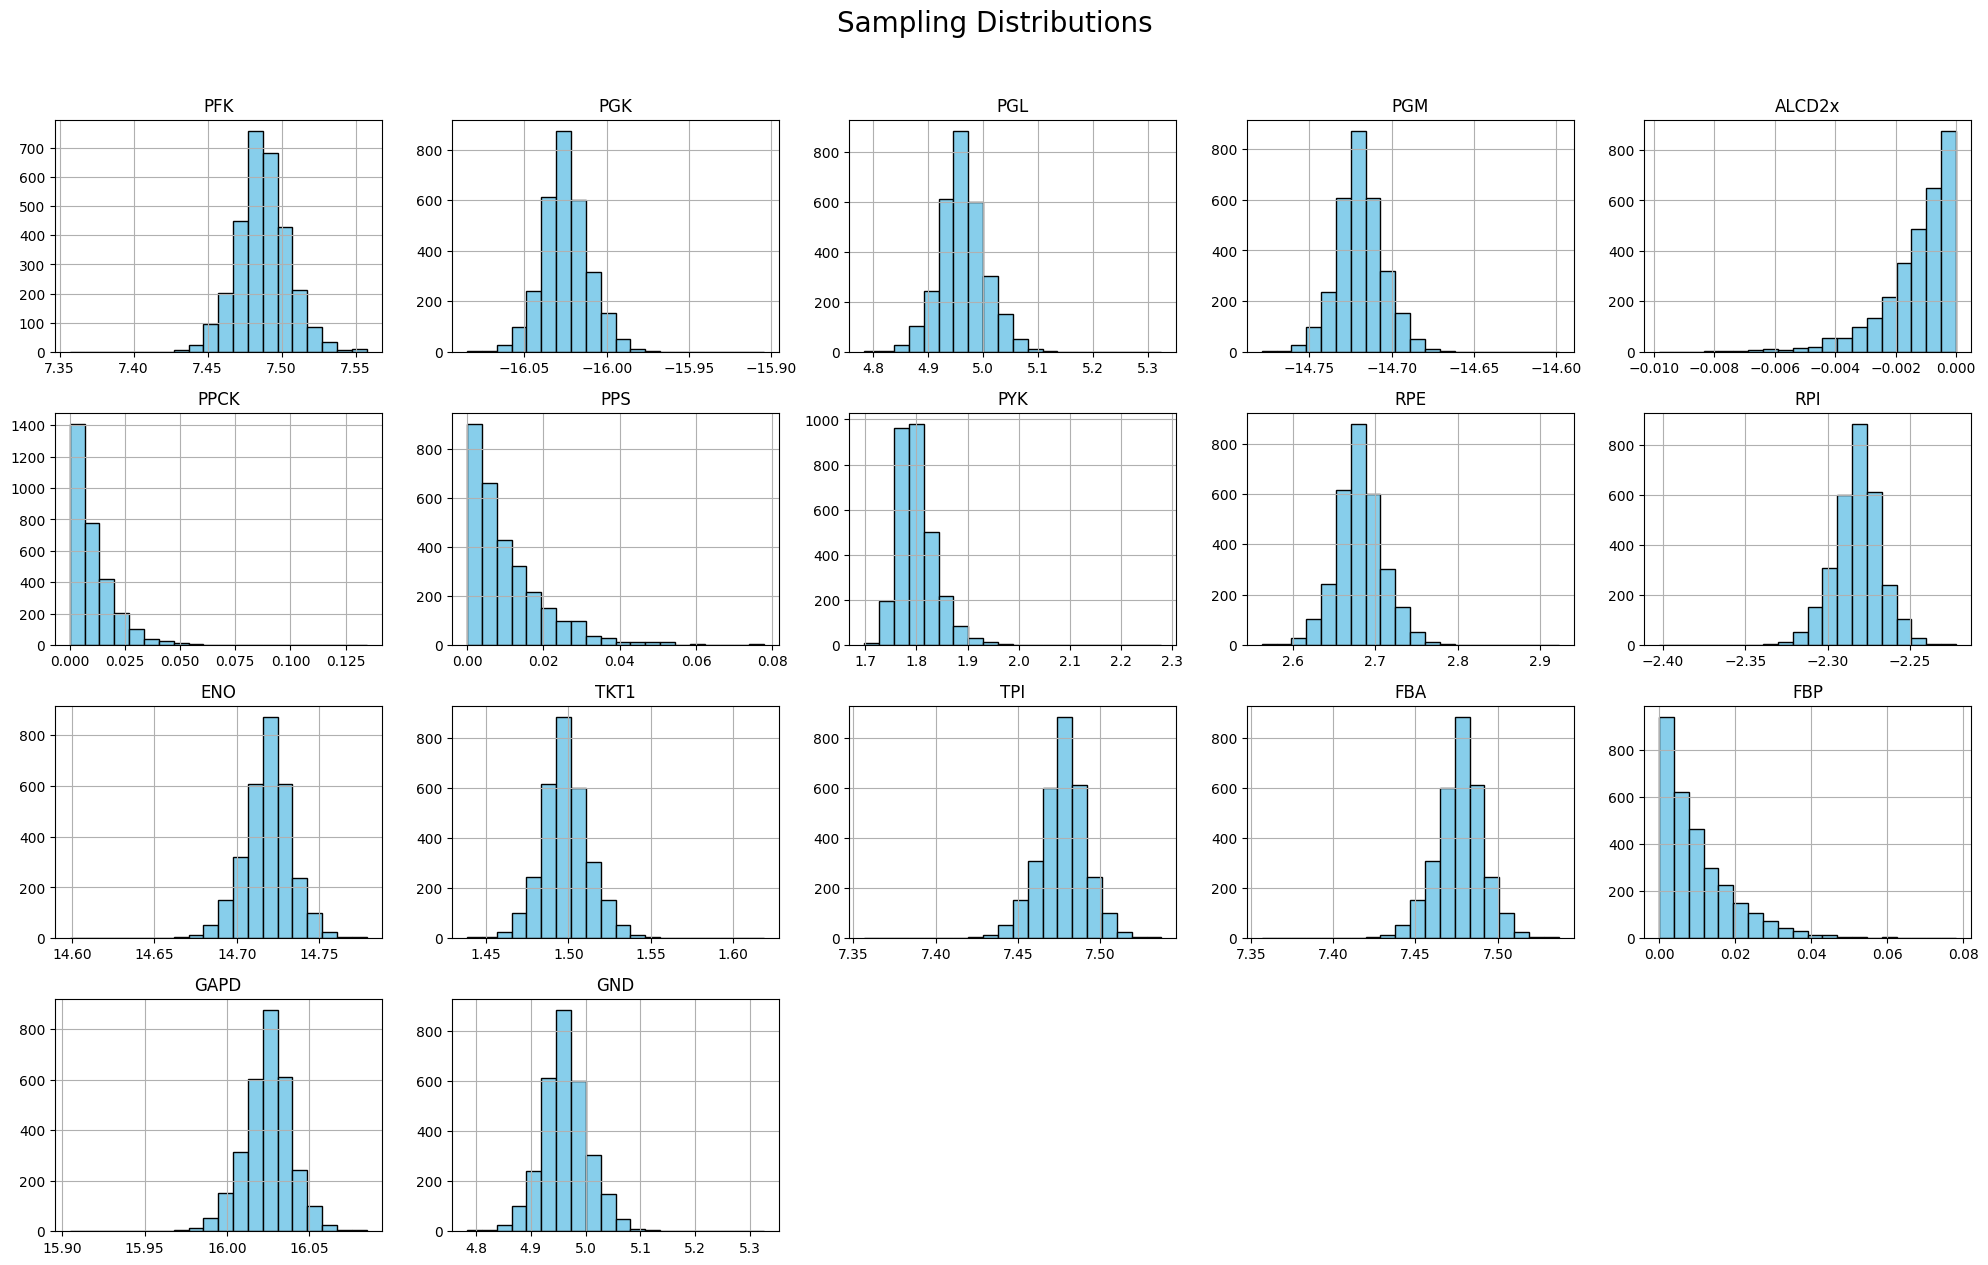

In [10]:

plot_grid_reactions_flux(subset_pathways_optgp_condition_100, 
                         reactions_in_pathways_ordered, 
                         nrows=5, ncols=5,
                         tolerance=1e-3,
                         title="Sampling Distributions")


In the following chunk the grid from glycolysis and ppp pathways resulting from the second sampling dataframe exists

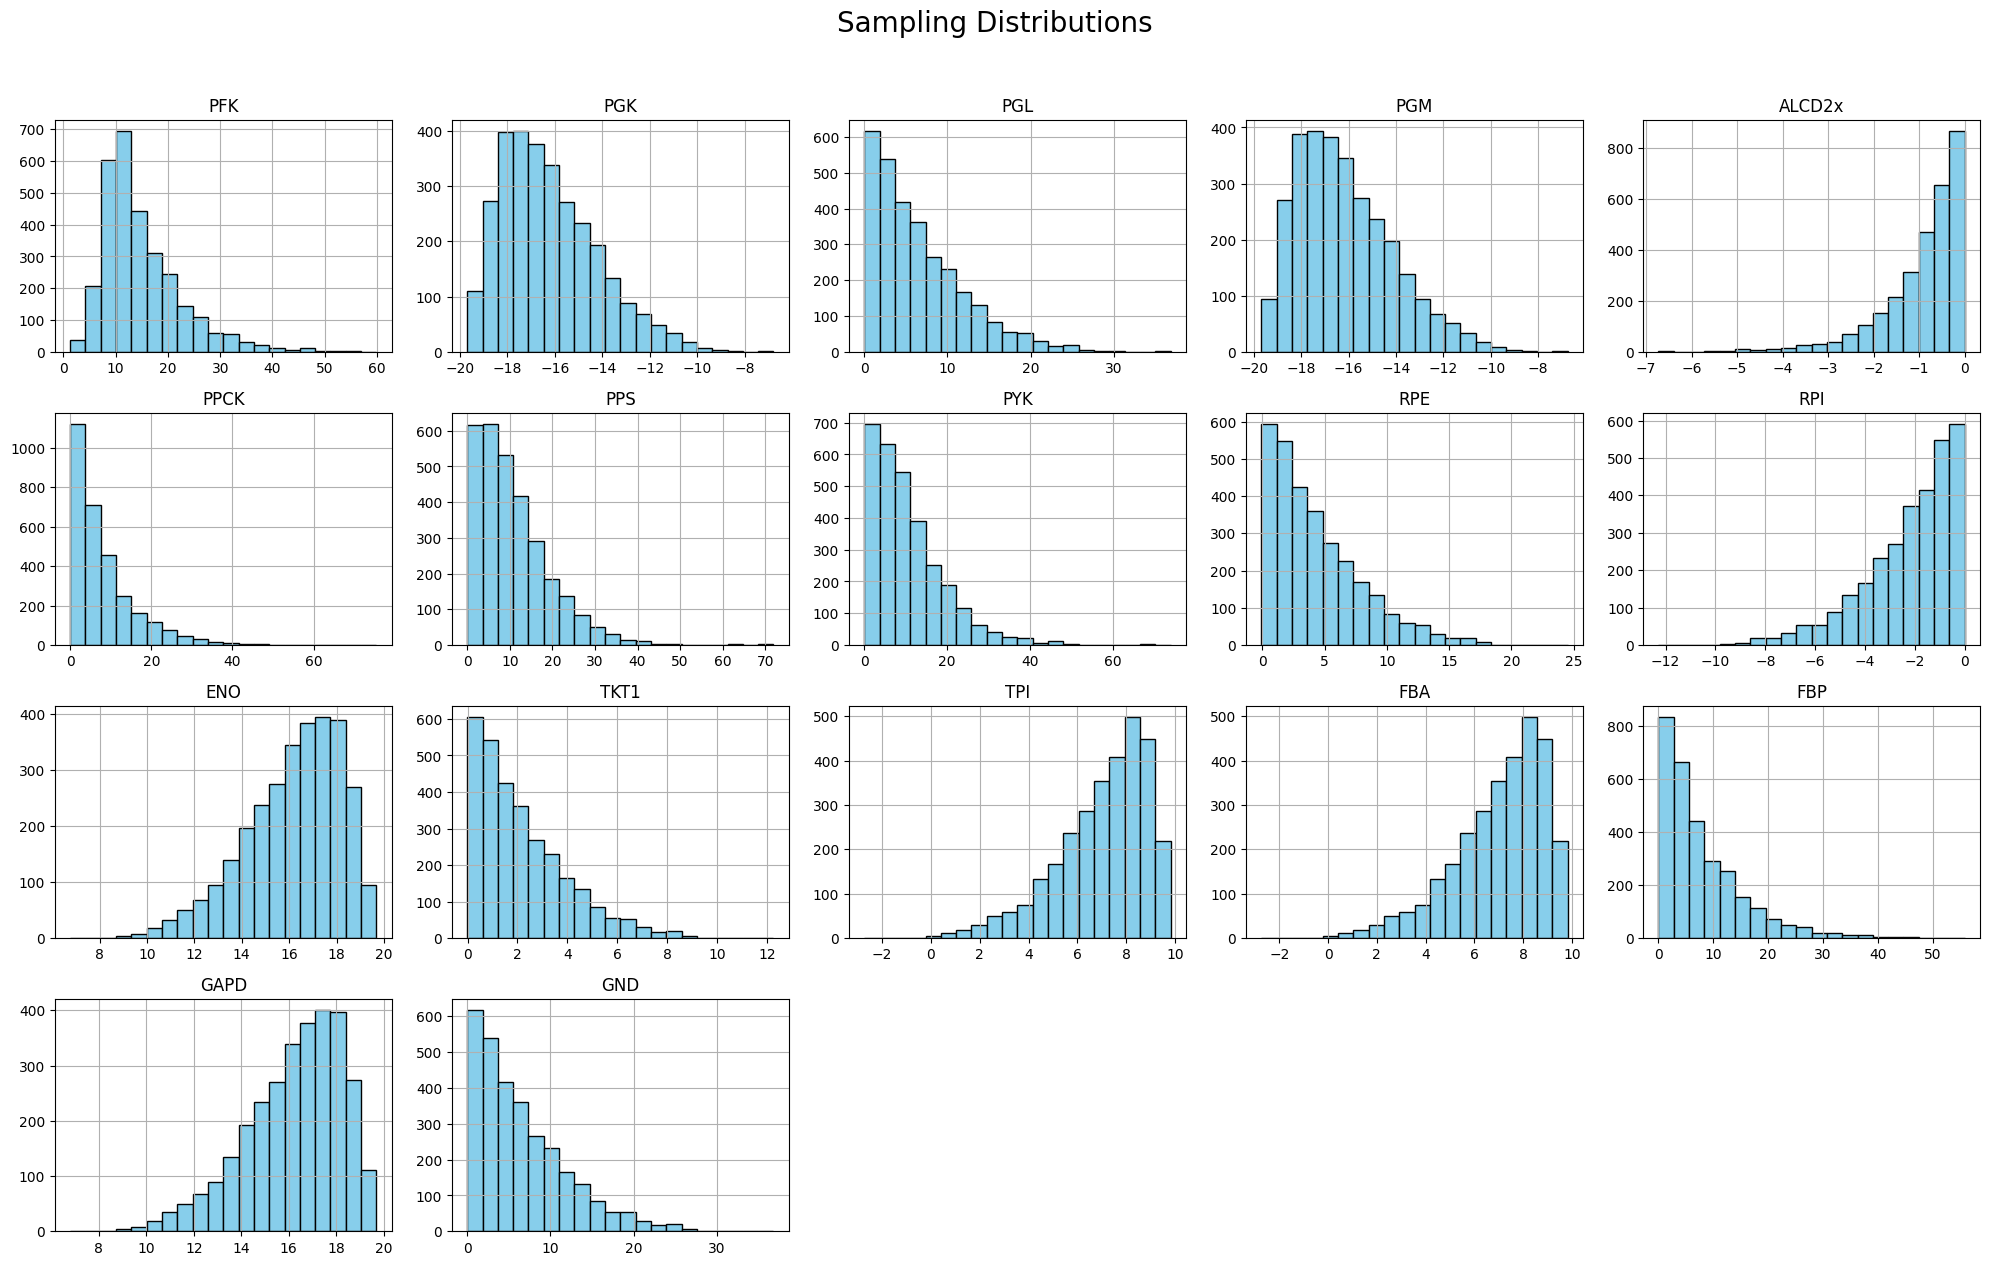

In [11]:

plot_grid_reactions_flux(subset_pathways_optgp_condition_0, 
                         reactions_in_pathways_ordered, 
                         nrows=5, ncols=5,
                         tolerance=1e-3,
                         title="Sampling Distributions")


### Print statistics for reaction of interest

Statistics (e.g. mean, min, max, std, ...) are calculated and printed for each sampling dataframe.

This information can be used to identify significantly altered flux distributions


In [12]:

mean, min, max, std, skewness, kurtosis = sampling_statistics(samples_optgp_condition_100, 
                                                              reactions_ids_list=ec_dingo_reactions,
                                                              reaction_id="FRD7")
print(mean, min, max, std, skewness, kurtosis)


mean, min, max, std, skewness, kurtosis = sampling_statistics(samples_optgp_condition_0,
                                                              reactions_ids_list=ec_dingo_reactions,
                                                              reaction_id="FRD7")
print(mean, min, max, std, skewness, kurtosis)


482.06901338369624 0.3586166808932738 994.575420303105 287.6974335992407 0.05874320776392963 -1.2093529813927735
478.40956784345707 0.5217294182272791 995.2853267289933 290.24862286351464 0.09330970848561565 -1.2172325950228189
